In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Downloads/framingham_heart_disease.csv')

In [3]:
# Displaying the head and tail of the dataset
head = data.head()
tail = data.tail()

# Checking for missing values
is_null = data.isnull().sum()

# Checking for duplicated entries
duplicated = data.duplicated().sum()

head, tail, is_null, duplicated


(   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0     1   39        4.0              0         0.0     0.0                0   
 1     0   46        2.0              0         0.0     0.0                0   
 2     1   48        1.0              1        20.0     0.0                0   
 3     0   61        3.0              1        30.0     0.0                0   
 4     0   46        3.0              1        23.0     0.0                0   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
 1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
 2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
 3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
 4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
 
    TenYearCHD  
 0           0  
 1

In [4]:
# Dropping duplicated rows if any exist
data_cleaned = data.drop_duplicates()

# Checking the shape of the original and cleaned data
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape


((4238, 16), (4238, 16))

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


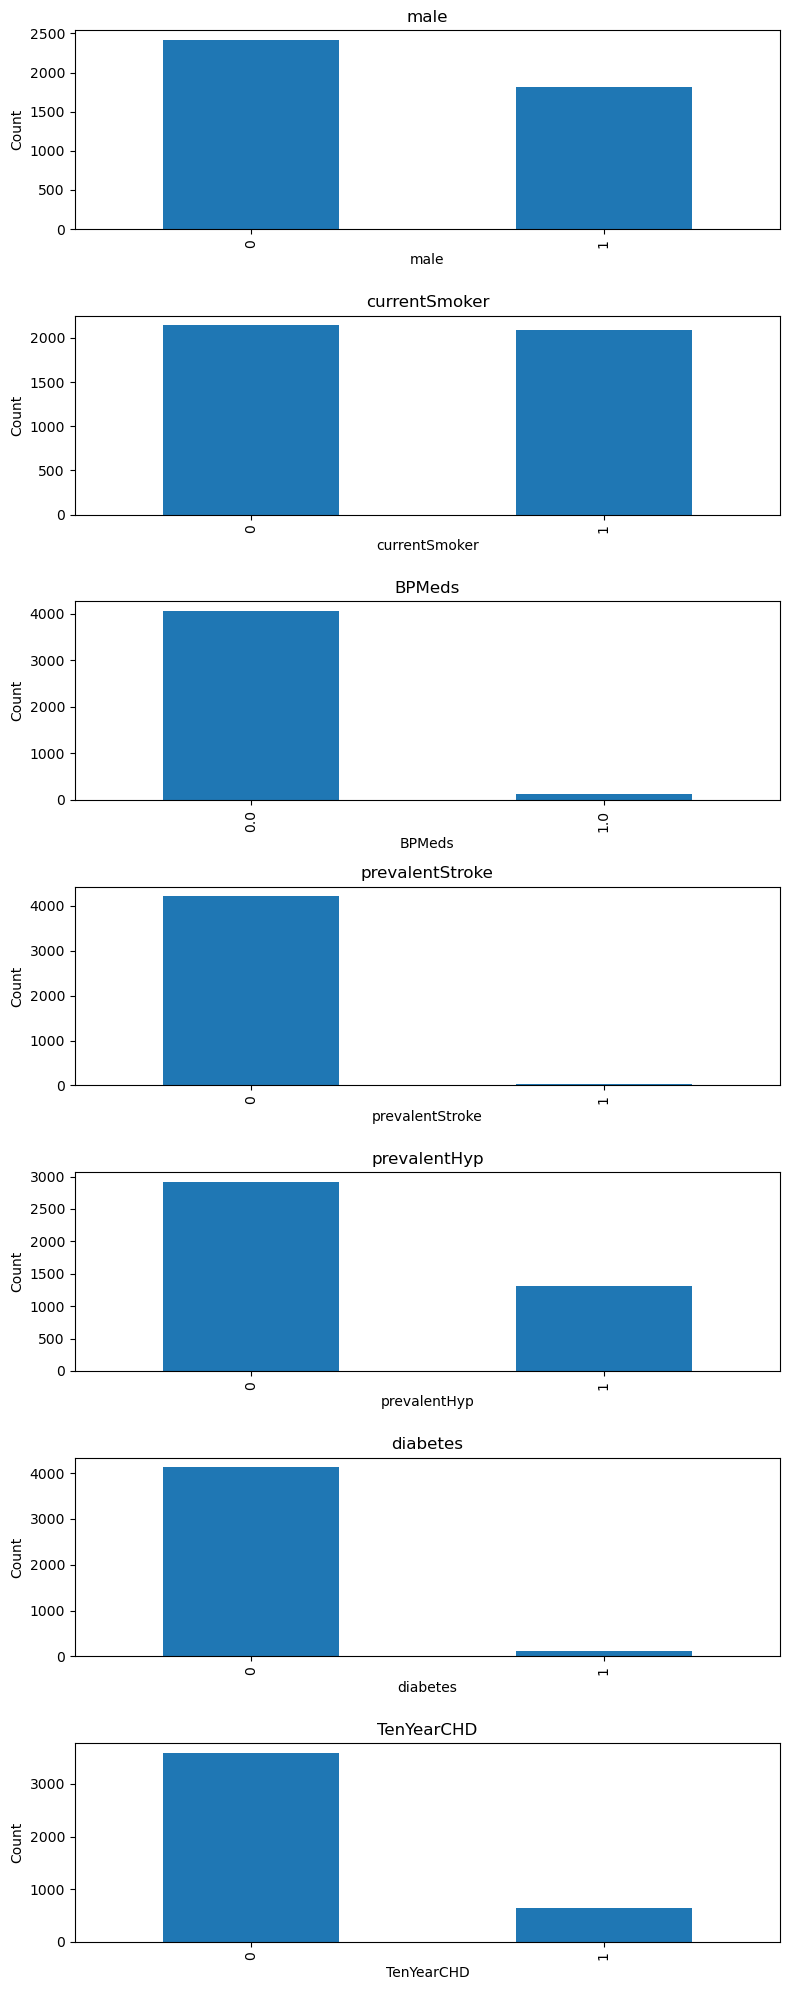

In [5]:
# Univariate Analysis for Categorical Variables
categorical_vars = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 20))

for i, var in enumerate(categorical_vars):
    data[var].value_counts().plot(kind='bar', ax=axes[i], title=var)
    axes[i].set_ylabel('Count')

plt.tight_layout()

# Univariate Analysis for Continuous Variables
continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
data[continuous_vars].describe()


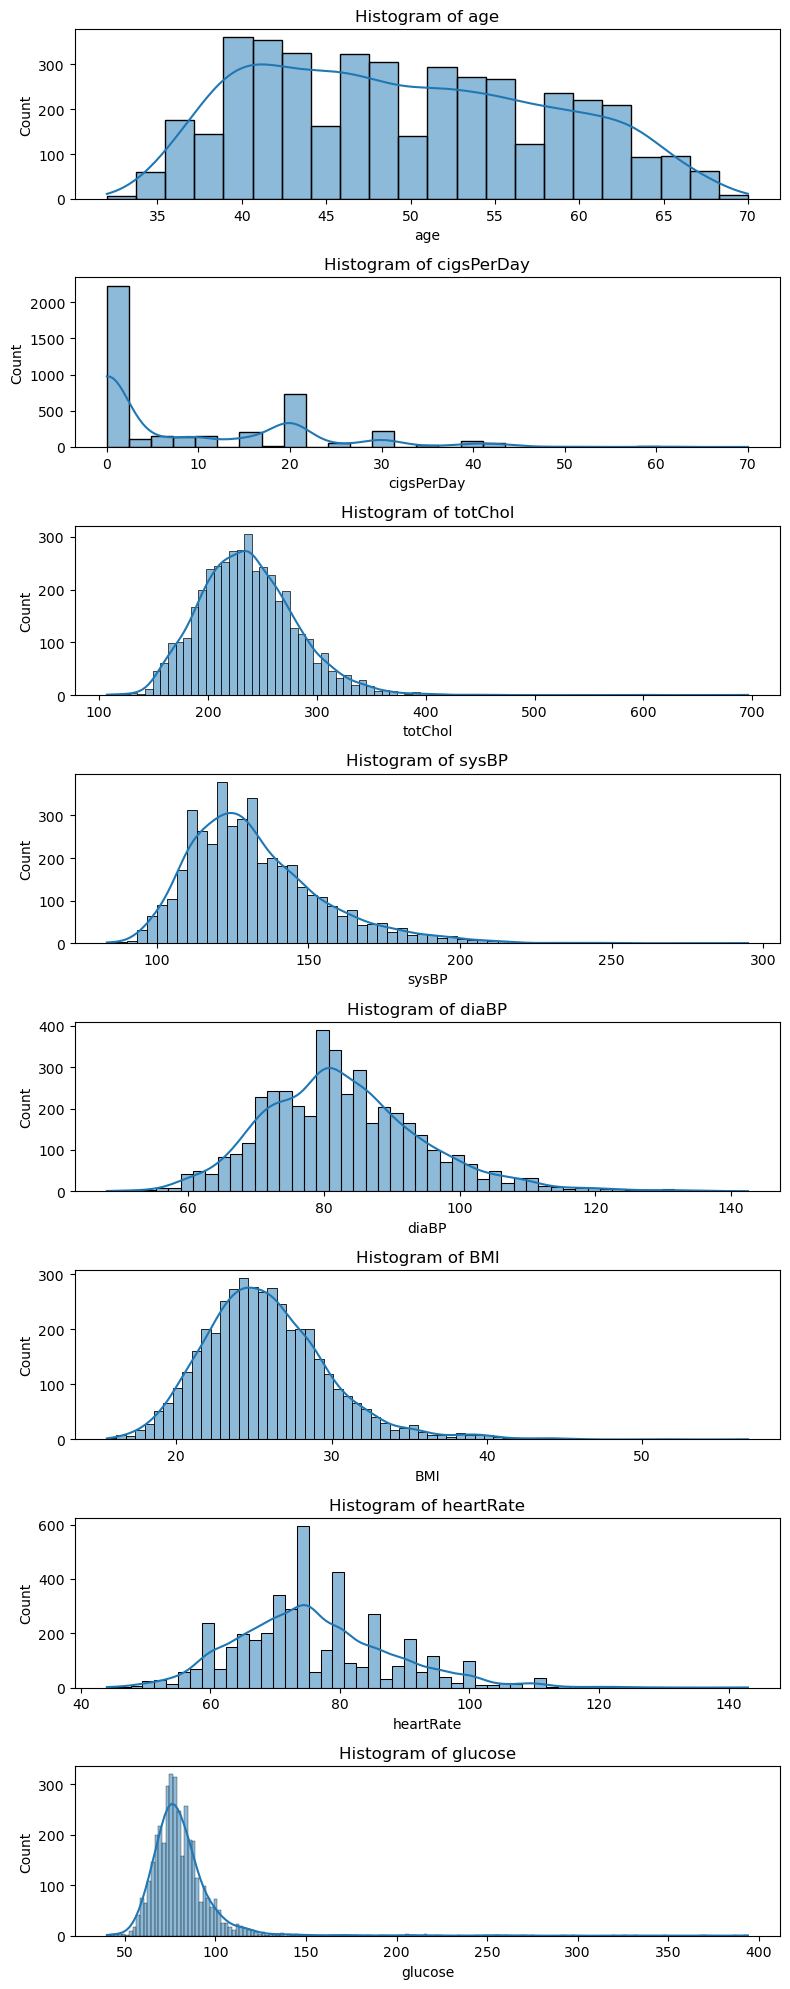

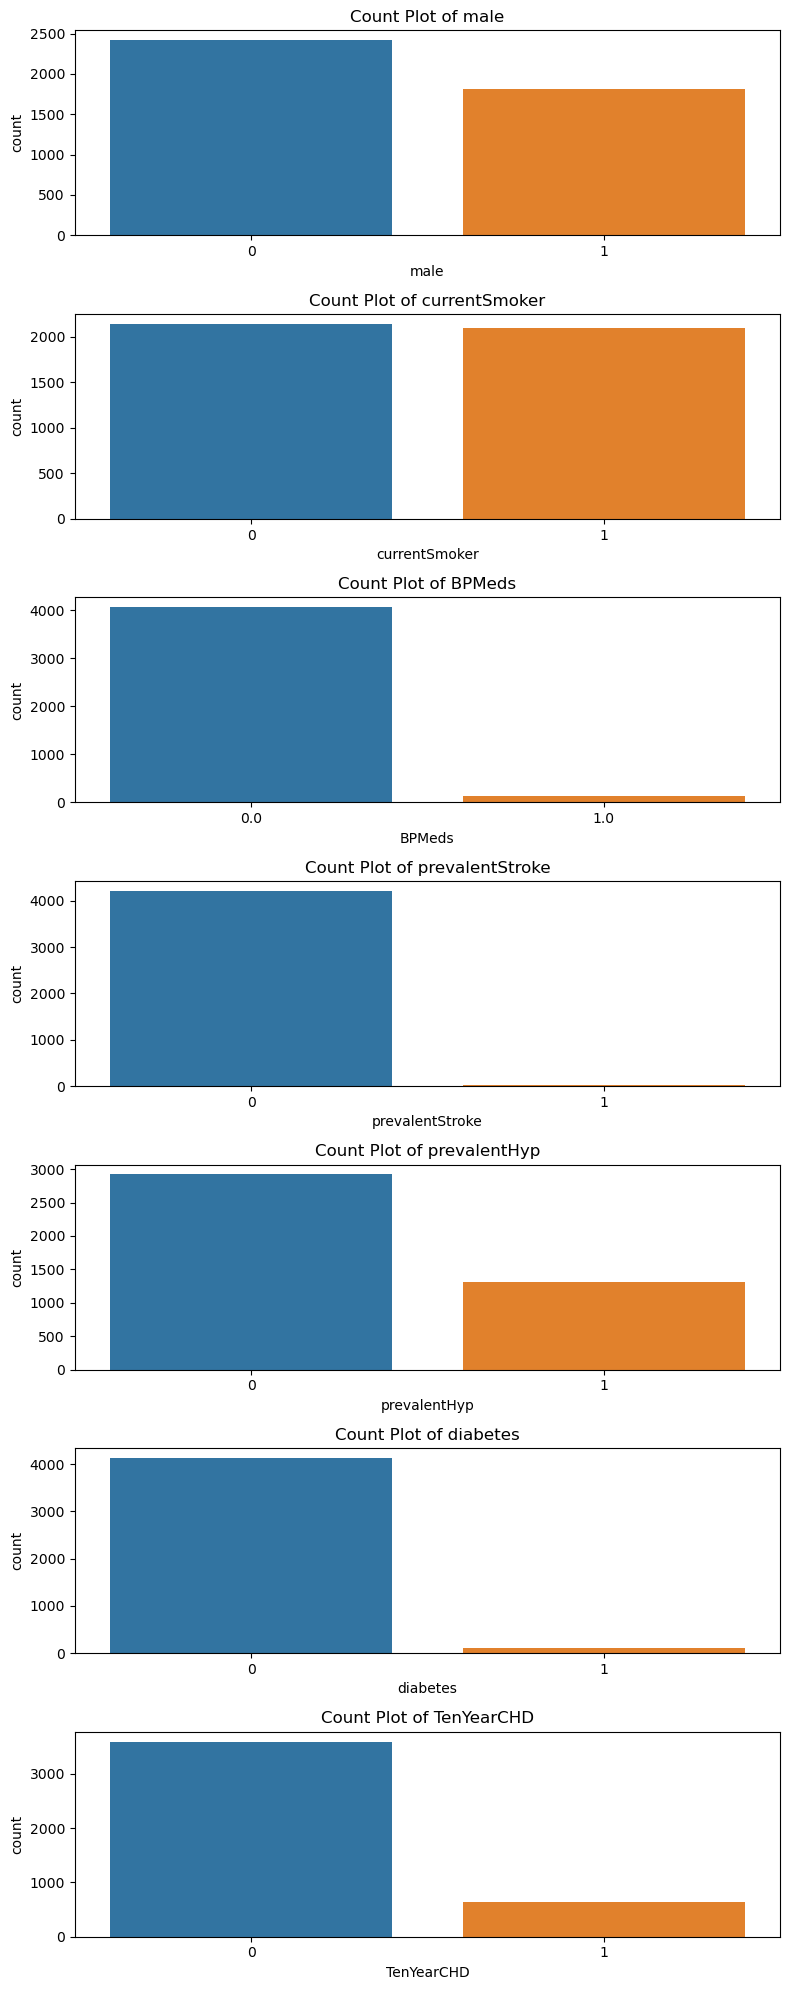

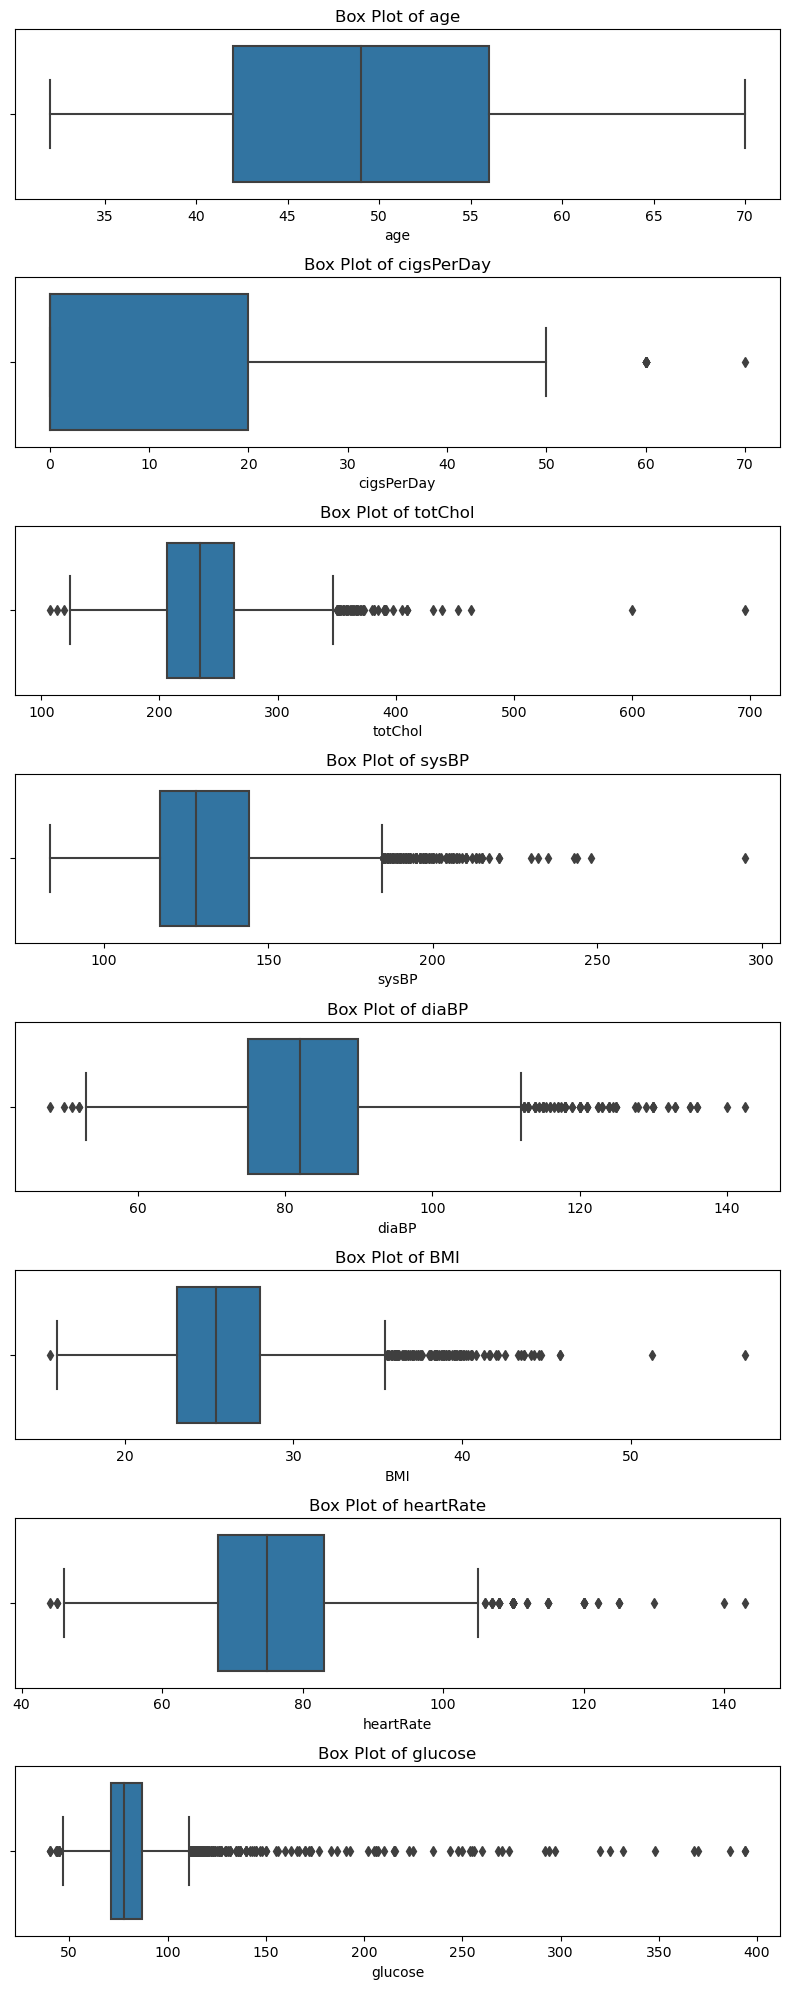

In [6]:
# Plotting histograms for continuous variables
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(8, 20))
for i, var in enumerate(continuous_vars):
    sns.histplot(data[var], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {var}')
plt.tight_layout()

# Plotting count plots for categorical variables
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 20))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=data[var], ax=axes[i])
    axes[i].set_title(f'Count Plot of {var}')
plt.tight_layout()

# Plotting box plots for continuous variables
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(8, 20))
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=data[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
plt.tight_layout()


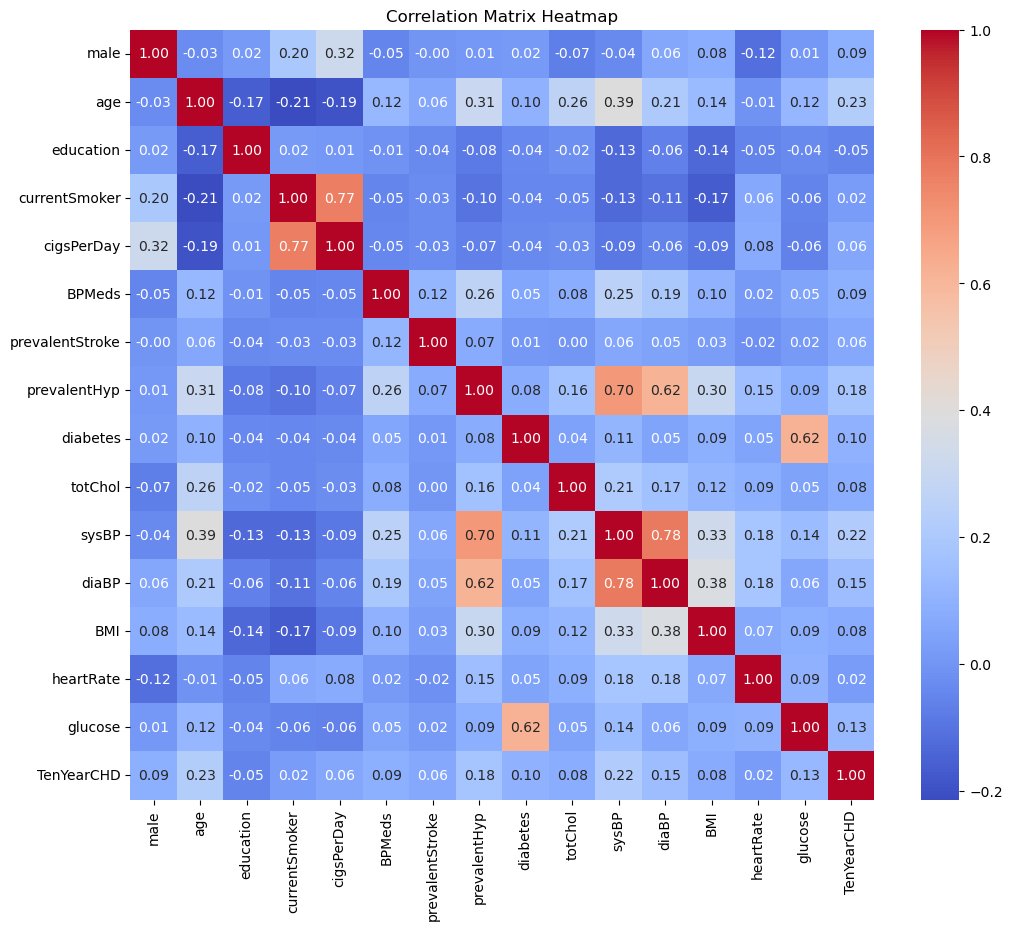

In [7]:
# Calculating the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [8]:
# Looping through each column to get value counts, unique values, and number of unique values
column_info = {}
for col in data.columns:
    column_info[col] = {
        'Value Counts': data[col].value_counts(),
        'Unique Values': data[col].unique(),
        'Number of Unique Values': data[col].nunique()
    }

column_info


{'male': {'Value Counts': male
  0    2419
  1    1819
  Name: count, dtype: int64,
  'Unique Values': array([1, 0]),
  'Number of Unique Values': 2},
 'age': {'Value Counts': age
  40    191
  46    182
  42    180
  41    174
  48    173
  39    169
  44    166
  45    162
  43    159
  52    149
  51    146
  55    145
  38    144
  47    141
  50    140
  53    139
  54    132
  49    132
  57    123
  56    123
  59    119
  58    117
  60    111
  63    110
  61    110
  62     99
  64     93
  37     92
  36     84
  65     57
  67     45
  35     42
  66     38
  34     18
  68     18
  69      7
  33      5
  70      2
  32      1
  Name: count, dtype: int64,
  'Unique Values': array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
         59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
         68, 33, 70, 32, 69]),
  'Number of Unique Values': 39},
 'education': {'Value Counts': education
  1.0    1720
  2.0    1253
  3.0     687
  4.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# Load your dataset
# data = pd.read_csv('./Downloads/framingham_heart_disease.csv')

# Assuming data is already loaded and is named 'data'

# Imputing missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Defining the target and features
target = 'TenYearCHD'
features = data_imputed.columns.drop([target, 'education'])

X = data_imputed[features]
y = data_imputed[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the logistic regression model
model = LogisticRegression(max_iter=1500)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1084
         1.0       0.71      0.11      0.19       188

    accuracy                           0.86      1272
   macro avg       0.79      0.55      0.55      1272
weighted avg       0.84      0.86      0.82      1272

Confusion Matrix:
[[1076    8]
 [ 168   20]]


Training Accuracy: 0.8533378287255563
Testing Accuracy: 0.8616352201257862


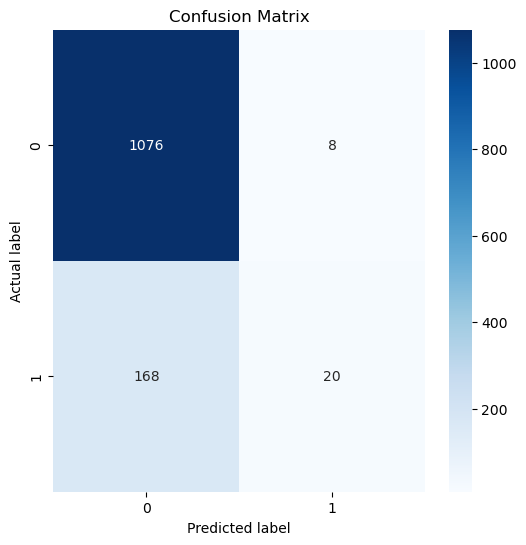

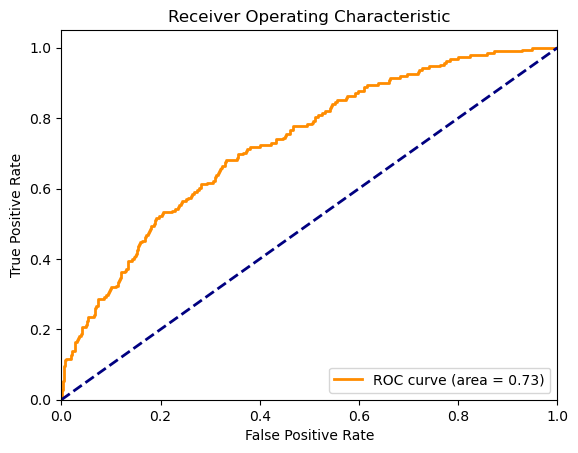

In [10]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Train predictions for training accuracy
y_train_pred = model.predict(X_train)

# Accuracy on training and testing set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Printing accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [11]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Load your dataset
# data = pd.read_csv(./Downloads/framingham_heart_disease.csv')

# Assuming data is already loaded and is named 'data'

# Imputing missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Defining the target and features
target = 'TenYearCHD'
features = data_imputed.columns.drop([target, 'education'])

X = data_imputed[features]
y = data_imputed[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Creating the logistic regression model
model = LogisticRegression(max_iter=1500)

# Training the model with resampled data
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77      1084
         1.0       0.26      0.66      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.66      0.57      1272
weighted avg       0.82      0.66      0.71      1272

Confusion Matrix:
[[719 365]
 [ 63 125]]
Accuracy: 0.6635220125786163
